In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Load the dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [7]:
def plot_sample(x, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

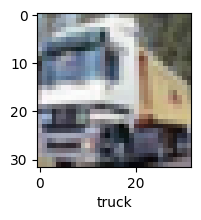

In [8]:
plot_sample(x_train, y_train, 1)

**Normalizing the training data**

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

**CNN Model**

In [10]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [11]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [12]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 79s 49ms/step - loss: 1.4870 - accuracy: 0.4647
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1204 - accuracy: 0.6070
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9971 - accuracy: 0.6514
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9232 - accuracy: 0.6785
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8640 - accuracy: 0.6983
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8175 - accuracy: 0.7145
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7762 - accuracy: 0.7294
Epoch 8/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7312 - accuracy: 0.7447
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6961 - accuracy: 0.7562
Epoch 10/10
1563/1563 [==============================] - 65s 41m

In [13]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9003 - accuracy: 0.6994


[0.9003375768661499, 0.699400007724762]

In [14]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 5s 17ms/step


array([[2.75209517e-04, 6.51100418e-04, 3.12013581e-04, 9.43916857e-01,
        5.79851971e-04, 4.31838967e-02, 2.57038721e-03, 1.28038766e-04,
        5.90536837e-03, 2.47727195e-03],
       [5.24648276e-05, 9.14506440e-04, 1.70463295e-06, 2.48848431e-09,
        2.94395424e-08, 9.05759773e-11, 7.73676068e-10, 3.43824344e-11,
        9.99016345e-01, 1.49139651e-05],
       [1.11034729e-01, 4.25741017e-01, 7.11966539e-04, 1.18737889e-03,
        2.95744836e-03, 3.65789892e-04, 1.12106951e-04, 1.22208323e-03,
        3.36663485e-01, 1.20004006e-01],
       [7.19543993e-01, 6.34982891e-04, 7.41665065e-02, 6.21645362e-04,
        2.51012500e-02, 3.27912721e-06, 3.64817533e-05, 7.84641088e-05,
        1.79358467e-01, 4.54953581e-04],
       [3.34020342e-06, 8.41215879e-05, 1.80382486e-02, 1.63789801e-02,
        3.74149680e-01, 9.11005028e-03, 5.82134545e-01, 3.69235786e-05,
        4.83294534e-05, 1.57196318e-05]], dtype=float32)

In [15]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [16]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

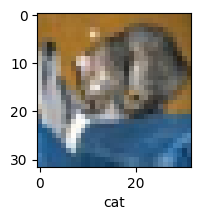

In [17]:
plot_sample(x_test, y_test, 0)

In [18]:
classes[y_classes[0]]

'cat'

**Classification Report**

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1000
           1       0.84      0.80      0.82      1000
           2       0.63      0.54      0.58      1000
           3       0.58      0.40      0.47      1000
           4       0.59      0.70      0.64      1000
           5       0.57      0.67      0.61      1000
           6       0.73      0.80      0.76      1000
           7       0.73      0.76      0.75      1000
           8       0.82      0.81      0.81      1000
           9       0.75      0.81      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



**Confusion Matrix**

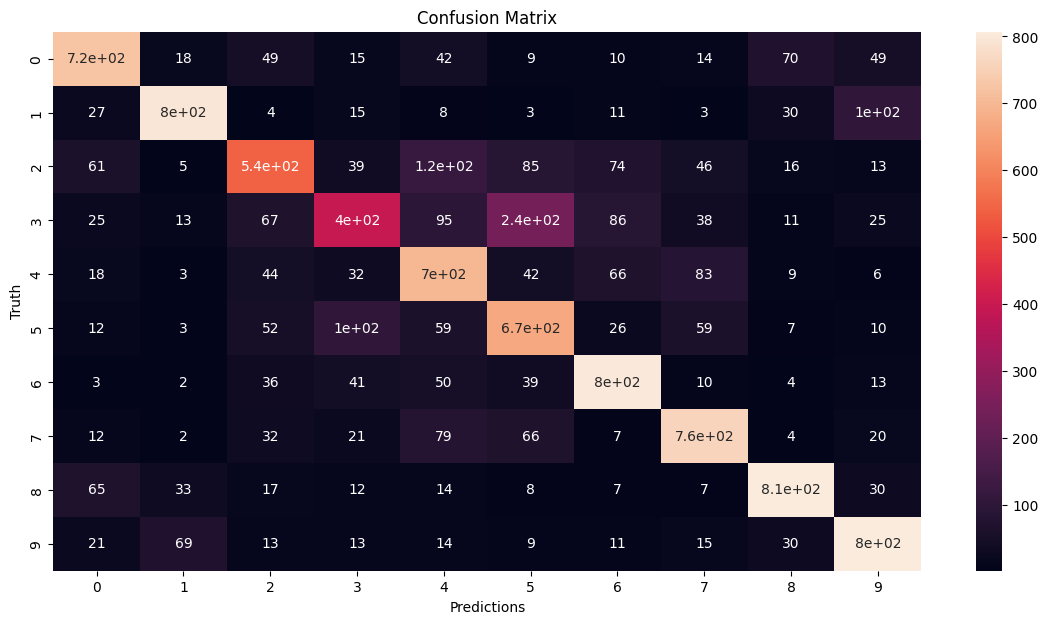

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_classes)

plt.figure(figsize=(14, 7))
sns.heatmap(cm, annot=True)
plt.ylabel("Truth")
plt.xlabel("Predictions")
plt.title("Confusion Matrix")
plt.show()